##  Anomaly detection

In [3]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

In [4]:
## load daata
data_path = 'CC GENERAL.csv' 
df = pd.read_csv(data_path)
df=df.set_index('CUST_ID')

## drop nulls
df=df.dropna()

## scalling
scale_transform = StandardScaler()
df_scaled = scale_transform.fit_transform(df)

In [5]:
## describe data 
df_scaled= pd.DataFrame(df_scaled, columns=df.columns,
                          index=df.index)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   float64
 11  PURCHASES_TRX                     8636 non-null   float64
 12  CRED

In [6]:
df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-2.506872e-18,-5.691243e-15,4.031476e-16,-5.819743e-15,2.643555e-15,-4.502548e-15,-2.185028e-16,-8.273836e-15,-2.426601e-15,1.812520e-15,-6.369898e-16,-2.611357e-15,5.480666e-16,4.343960e-17,1.740219e-16,-3.688766e-15,-2.976776e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-7.641437e-01,-4.309583e+00,-4.732082e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-6.132812e-01,-3.643042e-01,-5.377269e-01,-4.221800e+00
25%,-6.934691e-01,6.767893e-02,-4.531953e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-4.694457e-01,-2.930083e-01,-5.377269e-01,3.551807e-01
50%,-3.265978e-01,5.054046e-01,-2.999696e-01,-3.324445e-01,-3.554965e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-3.051243e-01,-2.326108e-01,-5.377269e-01,3.551807e-01
75%,2.405073e-01,5.054046e-01,5.562856e-02,-3.444604e-03,6.901931e-02,6.515234e-02,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,5.727990e-02,-1.635812e-02,2.485496e-02,3.551807e-01
max,8.323708e+00,5.054046e-01,2.215714e+01,2.384284e+01,2.407255e+01,2.175188e+01,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,1.681891e+01,3.184159e+01,2.837758e+00,3.551807e-01


### Use T-sne to visualize data in 2d

In [ ]:
from sklearn.manifold import TSNE
tsne_original = TSNE(n_components=2, 
                       perplexity=30, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       n_iter=10**4, 
                       random_state=42)
tsne_results_original = tsne_original.fit_transform(df_scaled)
tsne_df_original = pd.DataFrame(tsne_results_original, index=df.index)

In [7]:
tsne_df_original = pd.read_csv('tsne_df_original_anomaly.csv',index_col='CUST_ID')

<AxesSubplot:xlabel='0', ylabel='1'>

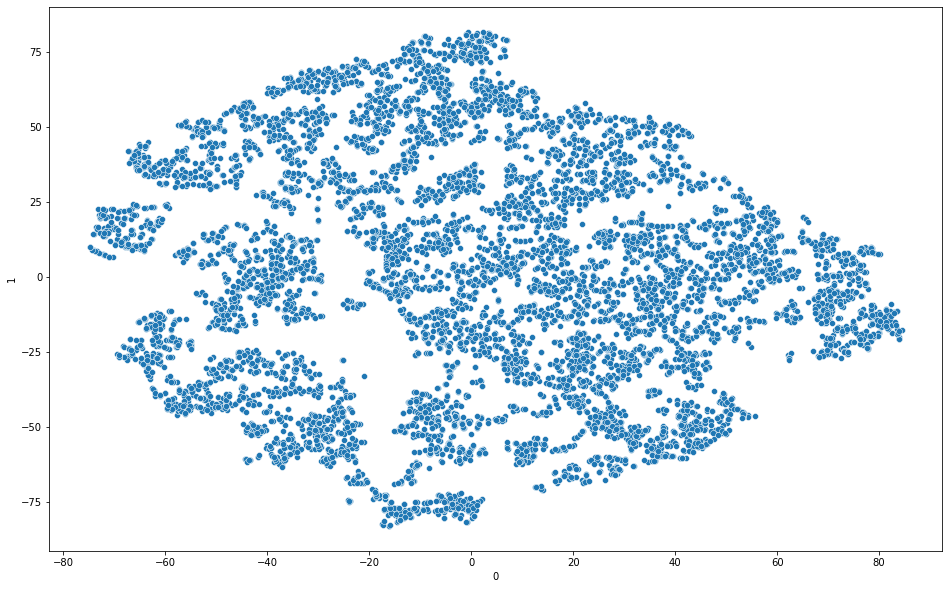

In [9]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1']
)

### 1. Use EM algorithm

In [11]:
# fit algorithm
em = GaussianMixture().fit(df_scaled)

# find probabilities for each sample
scores = em.score_samples(df_scaled)

# select threshold for 3%
thresh = np.quantile(scores, .03)
print(thresh)

scores= pd.DataFrame(scores,index=df.index)

tsne_df_original['label_em']=1
index = np.where(scores <= thresh)
tsne_df_original.loc[df_scaled.index[index[0]],'label_em'] = -1
#df_scaled.index.difference(index[0])
#df_scaled.iloc[index[0]]
tsne_df_original['label_em'].value_counts()


-33.75299319970743


 1    8376
-1     260
Name: label_em, dtype: int64

### Use T-sne to visualize data in 2d

[Text(0.5, 1.0, 'Anomaly using EM')]

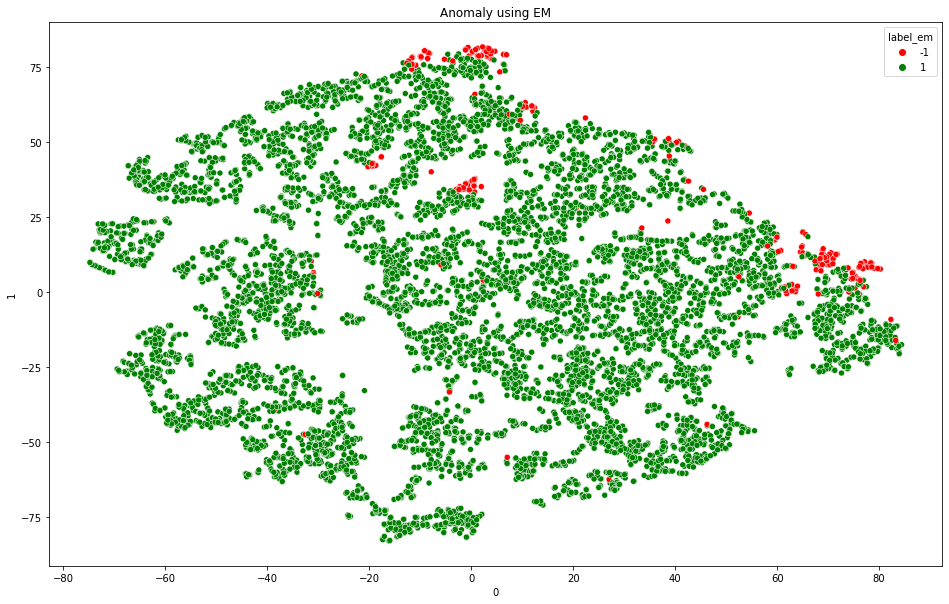

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1'],hue=tsne_df_original['label_em'],palette=["red",'green']
).set(title='Anomaly using EM')

### 2. Use Dbscan 

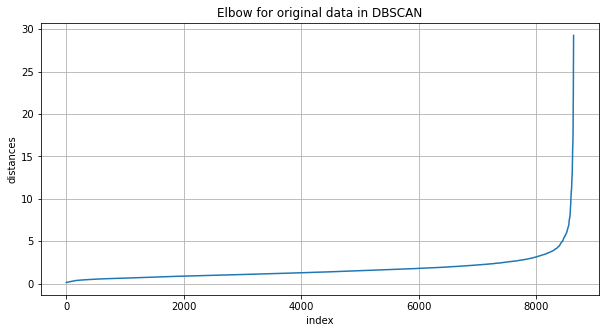

In [20]:
db1 = DBSCAN(eps = 4, min_samples = 34).fit(df_scaled)
df_label = pd.DataFrame(index=df_scaled.index)
df_label['label'] = db1.labels_

# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 34
nn = NearestNeighbors(mins + 1)

nn.fit(df_scaled)

distances, neighbors = nn.kneighbors(df_scaled)

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel('index')
plt.ylabel('distances')
plt.grid(True)
plt.title("Elbow for original data in DBSCAN")
plt.show()

In [21]:
df_label['label'].value_counts()

 0    8489
-1     147
Name: label, dtype: int64

In [22]:
tsne_df_original['label_dbscan']=df_label['label']

### Use T-sne to visualize data in 2d

[Text(0.5, 1.0, 'Anomaly using Dbscan')]

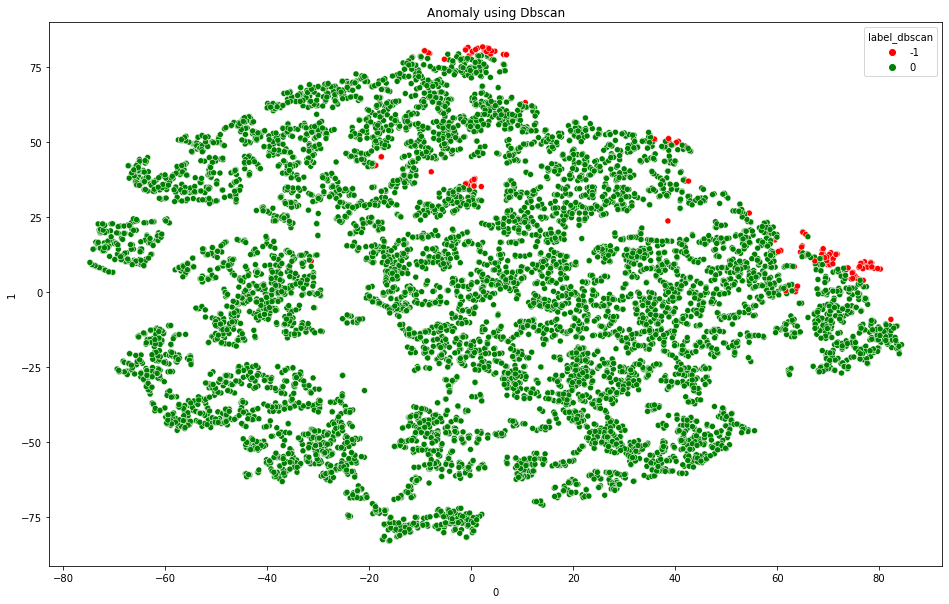

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1'],hue=tsne_df_original['label_dbscan'],palette=["red",'green']
).set(title='Anomaly using Dbscan')

## 3. Use Isolation Forest

In [24]:
clf = IsolationForest(random_state=0,contamination=0.1,n_estimators=50).fit(df_scaled)
labels= pd.DataFrame(clf.predict(df_scaled),index=df_scaled.index)

In [25]:
labels.value_counts()

 1    7772
-1     864
dtype: int64

In [26]:
tsne_df_original['label_IF']=labels

### Use T-sne to visualize data in 2d

[Text(0.5, 1.0, 'Anomaly using Isolation Forest')]

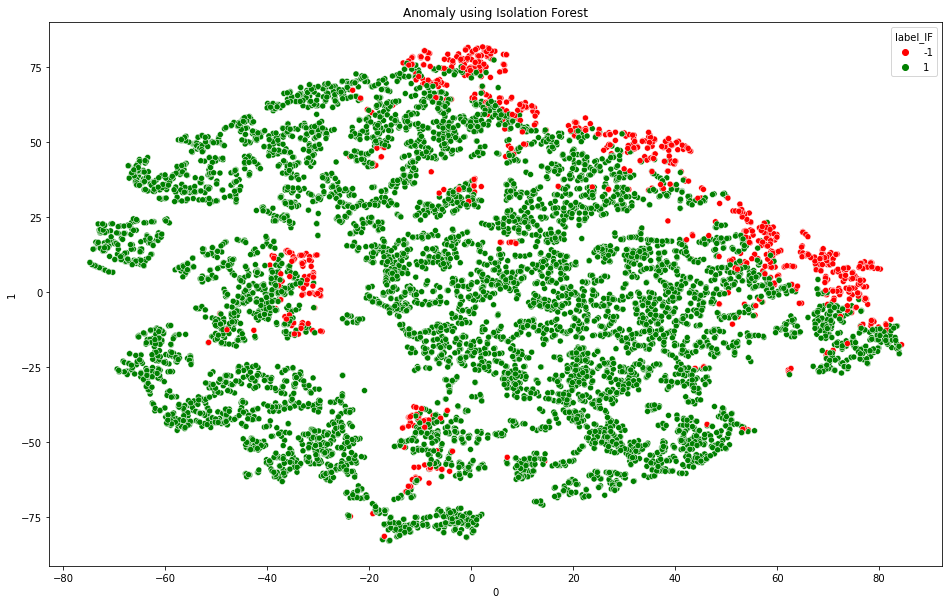

In [27]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1'],hue=tsne_df_original['label_IF'],palette=["red",'green']
).set(title='Anomaly using Isolation Forest')